# Telecom Churn

In this notebook, we'll explore Telecom Churn dataset and build an model to predict whether a high-value customer will churn or not, in near future,

We'll divide the analysis into the following parts:
- Data understanding, preparation, and feature engineering.
- Modelling (churn prediction).
- Identifying important churn indicators and business recommendation.
- Code readability and conciseness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 130)
pd.options.display.max_rows = 99
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
telecom = pd.read_csv("telecom_churn_data.csv",encoding='utf-8')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

# 2. Data Cleanup
- Need to check duplicate rows
- Checking nonempty columns in the file, as we can see there are many columns which dont contain any data. We have to first remove all those columns because they dont have any data, hence they cannot help in EDA as well.

### Removing Dupplicate Rows

In [4]:
telecom = telecom.drop_duplicates()
telecom.shape

(99999, 226)

### Dropping columns having more values as NA

In [5]:
telecom = telecom.dropna(axis=1, how='all')
telecom.shape

(99999, 226)

In [6]:
missing_values = telecom.isnull()
missing_values.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          False      False           False           False           False   
1          False      False           False           False           False   
2          False      False           False           False           False   
3          False      False           False           False           False   
4          False      False           False           False           False   

   last_date_of_month_6  last_date_of_month_7  last_date_of_month_8  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   last_date_of_month_9  arpu_6  arpu_7  arpu_8  arpu_9  onnet_mou_6  \
0                 False   False   False   False   False         True   
1                 False   False   False   False   False        False   
2                 False   False   False   False   False        False   
3                 False   False   False   False   False        False   
4                 False   False   False   False   False        False   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         True        False         True          True          True   
1        False        False        False         False         False   
2        False        False        False         False         False   
3        False        False        False         False         False   
4        False        False        False         False         False   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         False          True           True           True          False   
1         False         False          False          False          False   
2         False         False          False          False          False   
3         False         False          False          False          False   
4         False         False          False          False          False   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           True           True           True          False           True   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              True              True             False              True   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              True              True             False              True   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             False             False   
4             False             False             False             False   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              True              True             False              True   
1             False             False             False             False   
2             False             False             False             False   
3             False             False             F

In [7]:
null_missing  = missing_values.sum()/len(telecom)

### Since there are many columns with high amount of missing values lets eliminate some of the columns

In [8]:
missing_features = null_missing[null_missing >= 0.70].index

In [9]:
telecom.drop(missing_features, axis=1, inplace=True)

In [10]:
telecom.shape

(99999, 186)

In [11]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [12]:
telecom = telecom.fillna(telecom.mean())

In [13]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100   132.395875   
1            9/30/2014   34.047  355.074  268.321   86.285    24.110000   
2            9/30/2014  167.690  189.058  210.226  290.714    11.540000   
3            9/30/2014  221.338  251.102  508.054  389.500    99.910000   
4            9/30/2014  261.636  309.876  238.174  163.426    50.310000   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0   133.670805         0.00   130.302327    197.935577    197.045133   
1    78.680000         7.68    18.340000     15.740000     99.840000   
2    55.240000        37.26    74.810000    143.330000    220.590000   
3    54.390000       310.98   241.710000    123.310000    109.010000   
4   149.440000        83.89    58.780000     76.960000     91.880000   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00    190.337222       9.950013       7.149898           0.00   
1        304.76     53.760000       0.000000       0.000000           0.00   
2        208.36    118.910000       0.000000       0.000000           0.00   
3         71.68    113.540000       0.000000      54.860000          44.38   
4        124.26     45.810000       0.000000       0.000000           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0       6.343841      13.911337       9.818732           0.00       8.555519   
1       0.000000       0.000000       0.000000           0.00       0.000000   
2      38.490000       0.000000       0.000000           0.00      70.940000   
3       0.000000       0.000000      28.090000          39.04       0.000000   
4       0.000000       0.000000       0.000000           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         47.100763          46.47301              0.00         44.584446   
1         23.880000          74.56000              7.68         18.340000   
2          7.190000          28.74000             13.58         14.390000   
3         73.680000          34.81000             10.61         15.490000   
4         50.310000         149.44000             83.89         58.780000   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         93.342088         91.397131              0.00         90.463192   
1         11.510000         75.940000            291.86         53.760000   
2         29.340000         16.860000             38.46         28.160000   
3        107.430000         83.210000             22.46         65.460000   
4         67.640000         91.880000            124.26         37.890000   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0          3.751013          3.792985              0.00          3.655123   
1          0.000000          0.000000              0.00          0.000000   
2         24.110000         21.790000             15.61         22.240000   
3          1.910000          0.650000              

In [14]:
#Filer High Value Customers
telecom['avg_6_7'] = (telecom.total_rech_amt_6 + telecom.total_rech_amt_7)/2
telecom['avg_6_7']

0         307.0
1         229.0
2         241.5
3         270.0
4         273.0
5          60.0
6         360.5
7        1185.0
8         519.0
9         207.5
10          0.0
11        183.0
12        110.0
13        380.0
14         50.0
15        343.0
16        459.0
17        408.0
18         45.0
19        224.0
20        343.5
21        640.0
22        142.5
23        227.0
24        385.0
25        311.0
26         77.0
27         30.0
28         96.5
29         98.0
30         86.0
31        305.5
32         47.0
33       1932.0
34        220.5
35        200.5
36        125.0
37         25.0
38        528.0
39        154.0
40        126.0
41        503.0
42        161.0
43        210.0
44        244.0
45        125.0
46        161.0
47        205.0
48       1448.5
          ...  
99950     195.0
99951      55.0
99952      61.0
99953      95.0
99954     228.0
99955     219.0
99956      67.0
99957    1024.0
99958     101.5
99959     472.0
99960     128.5
99961     408.0
99962   

In [15]:
cut_off_recharge_amount = telecom.avg_6_7.quantile(0.7)
cut_off_recharge_amount

368.5

In [16]:
high_value_customer_df = telecom[(telecom.avg_6_7 >= cut_off_recharge_amount)]
high_value_customer_df

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
13        7002191713        109             0.0             0.0   
16        7000875565        109             0.0             0.0   
17        7000187447        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
24        7001125315        109             0.0             0.0   
33        7000149764        109             0.0             0.0   
38        7000815202        109             0.0             0.0   
41        7000721289        109             0.0             0.0   
48        7000294396        109             0.0             0.0   
53        7002188521        109             0.0             0.0   
56        7002180748        109             0.0             0.0   
57        7001682585        109             0.0             0.0   
60        7000955945        109             0.0             0.0   
61        7000152517        109             0.0             0.0   
69        7002393996        109             0.0             0.0   
73        7002402996        109             0.0             0.0   
74        7001532600        109             0.0             0.0   
77        7001328263        109             0.0             0.0   
87        7001728145        109             0.0             0.0   
92        7001606600        109             0.0             0.0   
96        7001480390        109             0.0             0.0   
97        7000589828        109             0.0             0.0   
101       7001746121        109             0.0             0.0   
102       7001631060        109             0.0             0.0   
103       7002236431        109             0.0             0.0   
105       7000208415        109             0.0             0.0   
111       7001300706        109             0.0             0.0   
115       7001453769        109             0.0             0.0   
122       7000973464        109             0.0             0.0   
124       7000302971        109             0.0             0.0   
131       7000720792        109             0.0             0.0   
133       7002025665        109             0.0             0.0   
134       7000594971        109             0.0             0.0   
143       7000106299        109             0.0             0.0   
146       7001829654        109             0.0             0.0   
147       7000958601        109             0.0             0.0   
149       7001341776        109             0.0             0.0   
154       7002233336        109             0.0             0.0   
157       7002404282        109             0.0             0.0   
158       7001280759        109             0.0             0.0   
165       7001203322        109             0.0             0.0   
170       7001407002        109             0.0             0.0   
171       7000661238        109             0.0             0.0   
173       7001107676        109             0.0             0.0   
175       7000504416        109             0.0             0.0   
176       7001503264        109             0.0             0.0   
177       7000810100        109             0.0             0.0   
...              ...        ...             ...             ...   
99822     7001392102        109             0.0             0.0   
99823     7000007881        109             0.0             0.0   
99824     7001137486        109             0.0             0.0   
99827     7000231239        109             0.0             0.0   
99828     7000620053        109             0.0             0.0   
99836     7000345239        109             0.0             0.0   
99838     7001513236        109             0.0             0.0   
99839     7002274718        109             0.0             0.0   
99850     7002301381        109             0.0       

In [17]:
high_value_customer_df.shape

(30011, 187)

total_ic_mou_9 - Total incoming calls Minutes of usage voice calls in the ninth month

total_og_mou_9 - Total outgoing calls Minutes of usage voice calls in the ninth month

vol_2g_mb_9 - 2G mobile Internet Usage volume

vol_3g_mb_9 - 3G mobile Internet Usage volume

In [18]:
def churn_true(column):
    if (column['total_ic_mou_9'] == 0 and column['total_og_mou_9'] == 0 and column['vol_2g_mb_9'] == 0 and column['vol_3g_mb_9'] == 0):
        return 1
    else:
        return 0

In [19]:
high_value_customer_df['churn'] = high_value_customer_df.apply(churn_true,axis=1)

In [20]:
high_value_customer_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']].head(50)

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
7              0.00            0.00         0.00         0.00      1
8             34.91          142.18         0.00         0.00      0
13           631.86          446.09         0.00         0.00      0
16           334.56          255.74         0.00         0.00      0
17            87.13          631.08         0.00         0.00      0
21           252.61         1031.53         0.00         0.00      0
24           330.03          627.78         0.00         0.00      0
33           114.16            1.70        30.92      5588.11      0
38           114.09          708.04         0.00         0.00      0
41           165.84           89.13         0.00         0.00      0
48           894.81         2319.01         0.00         0.00      0
53           680.61          503.06         0.82         0.00      0
56           225.34          127.48       137.12       835.99      0
57          1047.41          326.29        22.05      4305.54      0
60           233.49          243.91         0.00         0.00      0
61           376.68          259.98        71.91         0.00      0
69           134.43          540.46         0.00         0.00      0
73           270.26         1609.36         0.00         0.00      0
74           119.03          686.28         0.00         0.00      0
77            53.38           67.24         0.00         0.00      0
87           603.29          673.81       117.50         0.00      0
92           315.49          515.68       712.87         0.00      0
96           156.14         1091.23         0.00         0.00      0
97             0.00            0.00         0.00         0.00      1
101          123.71          203.81       687.85         0.58      0
102          166.71          288.38         0.00         0.00      0
103         1389.76         1487.34         0.00         0.00      0
105          254.98          498.94         0.00       892.97      0
111            0.00            0.00         0.00         0.00      1
115         1465.81         1074.09         0.00         0.00      0
122            0.18          315.74         0.00         0.00      0
124           79.38          268.78        87.34         0.00      0
131          312.19          591.19         0.00         0.00      0
133          428.63         1252.48        14.59       135.70      0
134           99.56           91.53        83.52       807.91      0
143            0.00            0.00         0.00         0.00      1
146          150.43         1918.91         0.00         0.00      0
147          226.34          289.44        70.91       718.40      0
149          425.48          262.76        37.00       692.63      0
154          777.66         1742.94         0.00         0.00      0
157          142.18          464.86         4.26      2140.10      0
158         1032.21         1758.93        13.05       728.02      0
165           99.43          163.66         0.00         0.00      0
170          363.56          562.14       845.67       447.04      0
171           41.38          434.83         0.00         0.00      0
173          129.58         2485.86         0.00         0.00      0
175          545.44          369.18         0.00         0.00      0
176          104.53            0.00       548.29       176.26      0
177           76.74           64.21         1.78      1761.57      0
184          330.01          284.86         0.00         0.00      0

In [21]:
for col in list(high_value_customer_df.columns):
    if('_6' in col or '_7' in col or '_9' in col):
        high_value_customer_df.drop(col,axis=1,inplace=True)

In [22]:
print(high_value_customer_df.head())
print(high_value_customer_df.shape)

    mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
13     7002191713        109             0.0             0.0             0.0   
16     7000875565        109             0.0             0.0             0.0   
17     7000187447        109             0.0             0.0             0.0   

   last_date_of_month_8    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
7             8/31/2014  3171.480        52.29        325.91          31.64   
8             8/31/2014   137.362        35.08        136.48           0.00   
13            8/31/2014   593.260       534.24        482.46          72.11   
16            8/31/2014   187.894        70.61        162.76           0.00   
17            8/31/2014    25.499         7.79          5.54           4.81   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_

In [23]:
#Delete the columns having only zero values
high_value_customer_df= high_value_customer_df.loc[:, (high_value_customer_df != 0).any(axis=0)]

In [24]:
high_value_customer_df.head()

mobile_number  circle_id last_date_of_month_8    arpu_8  onnet_mou_8  \
7      7000701601        109            8/31/2014  3171.480        52.29   
8      7001524846        109            8/31/2014   137.362        35.08   
13     7002191713        109            8/31/2014   593.260       534.24   
16     7000875565        109            8/31/2014   187.894        70.61   
17     7000187447        109            8/31/2014    25.499         7.79   

    offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
7         325.91          31.64          38.06             40.28   
8         136.48           0.00           0.00             12.49   
13        482.46          72.11           1.44             36.01   
16        162.76           0.00           0.00             67.38   
17          5.54           4.81          13.34              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
7             162.28             53.23              0.00        255.79   
8              50.54              0.00              7.15         63.04   
13            294.46             23.51              0.49        353.99   
16            128.28             10.26              0.00        205.93   
17              0.00              0.00              0.00          0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
7              12.01             49.14             16.68         77.84   
8              22.58             75.69              0.00         98.28   
13            498.23            156.94              0.00        655.18   
16              3.23             18.29              0.00         21.53   
17              0.00              0.00              0.00          0.00   

    isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
7          10.01          6.50          0.0          350.16             27.31   
8           0.00         10.23          0.0          171.56              0.31   
13          1.29          4.78          0.0         1015.26             52.58   
16          0.00          5.91          0.0          233.38             28.89   
17          0.00          0.00          0.0            0.00              0.00   

    loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
7             121.19             39.53        188.04             30.39   
8              15.48              0.00         15.79              0.10   
13            195.18              7.49        255.26            154.58   
16            150.16             32.71        211.78              6.33   
17              0.00              0.00          0.00              0.00   

    std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  \
7             141.33             22.21        193.94          428.74   
8               0.65              0.00          0.75           16.54   
13            317.91              1.91        474.41         1144.53   
16             73.93              2.18         82.44          294.46   
17              0.00              0.00          0.00            0.00   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
7            0.0         31.59        15.14                 7   
8            0.0          0.00         0.00                14   
13           0.0        393.39        21.44                11   
16           0.0          0.23         0.00                 2   
17           0.0          0.00         0.00                 4   

    total_rech_amt_8  max_rech_amt_8 date_of_last_rech_8  last_day_rch_amt_8  \
7               3638            1580           8/26/2014                 779   
8                120              30           8/30/2014                  10   
13               717             130           8/30/2014                   0   
16               160             130           8/14/2014                 130   
17                30              30           8/25/2014                   0   

    vol_2g_

In [25]:
high_value_customer_df.shape

(30011, 50)

In [26]:
high_value_customer_df.groupby('churn').count()

mobile_number  circle_id  last_date_of_month_8  arpu_8  onnet_mou_8  \
churn                                                                        
0              27418      27418                 27418   27418        27418   
1               2593       2593                  2436    2593         2593   

       offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
churn                                                                 
0             27418          27418          27418             27418   
1              2593           2593           2593              2593   

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
churn                                                                       
0                 27418             27418             27418         27418   
1                  2593              2593              2593          2593   

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
churn                                                                       
0                 27418             27418             27418         27418   
1                  2593              2593              2593          2593   

       isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
churn                                                            
0             27418         27418        27418           27418   
1              2593          2593         2593            2593   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
churn                                                                       
0                 27418             27418             27418         27418   
1                  2593              2593              2593          2593   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
churn                                                                       
0                 27418             27418             27418         27418   
1                  2593              2593              2593          2593   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
churn                                                            
0               27418         27418         27418        27418   
1                2593          2593          2593         2593   

       total_rech_num_8  total_rech_amt_8  max_rech_amt_8  \
churn                                                       
0                 27418             27418           27418   
1                  2593              2593            2593   

       date_of_last_rech_8  last_day_rch_amt_8  vol_2g_mb_8  vol_3g_mb_8  \
churn                                                                      
0                    27131               27418        27418        27418   
1                     2286                2593         2593         2593   

       monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8    aon  \
churn                                                                
0             27418        27418         27418        27418  27418   
1              2593         2593          2593         2593   2593   

       aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
churn                                                  
0           27418       27418       27418       27418  
1            2593        2593        2593        2593

## Chrun Percentage

In [27]:
churn = (sum(high_value_customer_df['churn'])/len(high_value_customer_df['churn'].index))*100
churn

8.64016527273333

### Since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance.

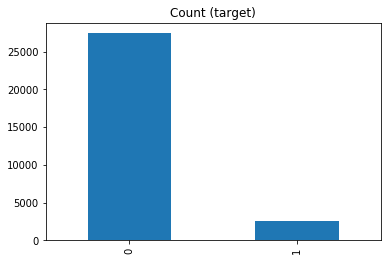

In [28]:
churn_count = high_value_customer_df.churn.value_counts()
churn_count.plot(kind='bar', title='Count (target)');

In [29]:
non_chrun = high_value_customer_df[high_value_customer_df.churn==0]
chrun = high_value_customer_df[high_value_customer_df.churn==1]

In [30]:
from sklearn.utils import resample
chrun_upsampled = resample(chrun,
                          replace=True, # sample with replacement
                          n_samples=len(non_chrun), # match number in majority class
                          random_state=27) # reproducible results

In [31]:
upsampled = pd.concat([non_chrun, chrun_upsampled])
upsampled

mobile_number  circle_id last_date_of_month_8    arpu_8  onnet_mou_8  \
8         7001524846        109            8/31/2014   137.362    35.080000   
13        7002191713        109            8/31/2014   593.260   534.240000   
16        7000875565        109            8/31/2014   187.894    70.610000   
17        7000187447        109            8/31/2014    25.499     7.790000   
21        7002124215        109            8/31/2014   637.760    85.140000   
24        7001125315        109            8/31/2014   354.793   141.110000   
33        7000149764        109            8/31/2014   409.230     0.000000   
38        7000815202        109            8/31/2014   393.909   666.380000   
41        7000721289        109            8/31/2014   229.769    80.440000   
48        7000294396        109            8/31/2014   179.218   156.910000   
53        7002188521        109            8/31/2014   706.020   102.690000   
56        7002180748        109            8/31/2014   368.807    50.610000   
57        7001682585        109            8/31/2014   602.052    62.890000   
60        7000955945        109            8/31/2014   289.228    27.540000   
61        7000152517        109            8/31/2014   430.911   170.110000   
69        7002393996        109            8/31/2014    33.060     0.000000   
73        7002402996        109            8/31/2014   722.368  1074.980000   
74        7001532600        109            8/31/2014   350.360   551.610000   
77        7001328263        109            8/31/2014   674.950   149.690000   
87        7001728145        109            8/31/2014   560.995   132.790000   
92        7001606600        109            8/31/2014   463.903   144.810000   
96        7001480390        109            8/31/2014   377.488    74.490000   
101       7001746121        109            8/31/2014  1144.254   176.980000   
102       7001631060        109            8/31/2014   324.050    47.730000   
103       7002236431        109            8/31/2014   759.027   203.610000   
105       7000208415        109            8/31/2014   621.127   590.310000   
115       7001453769        109            8/31/2014   990.443    39.080000   
122       7000973464        109            8/31/2014   112.796   122.810000   
124       7000302971        109            8/31/2014   374.629   241.690000   
131       7000720792        109            8/31/2014   569.310    94.740000   
133       7002025665        109            8/31/2014   841.507  1360.690000   
134       7000594971        109            8/31/2014   480.940    57.990000   
146       7001829654        109            8/31/2014   857.387    72.490000   
147       7000958601        109            8/31/2014   380.262    25.480000   
149       7001341776        109            8/31/2014   781.006    92.890000   
154       7002233336        109            8/31/2014  1347.585   586.830000   
157       7002404282        109            8/31/2014   647.535    82.330000   
158       7001280759        109            8/31/2014  1121.204   351.830000   
165       7001203322        109            8/31/2014   139.673    27.990000   
170       7001407002        109            8/31/2014   574.812    60.730000   
171       7000661238        109            8/31/2014   416.213   222.430000   
173       7001107676        109            8/31/2014  1582.467  2712.380000   
175       7000504416        109            8/31/2014   231.557    77.290000   
176       7001503264        109            8/31/2014   136.817    77.660000   
177       7000810100        109            8/31/2014   320.134    15.530000   
184       7002346847        109            8/31/2014   918.314    49.740000   
185       7001104356        109            8/31/2014   310.567    30.560000   
191       7000608224        109            8/31/2014     0.000     0.000000   
195       7001931900        109            8/31/2014   538.332    30.440000   
...              ...        ...                  ...     

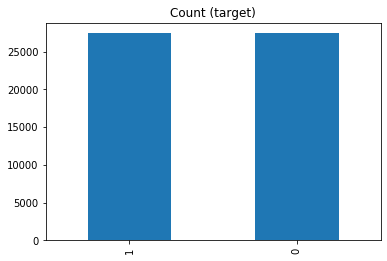

In [32]:
# check new class counts
churn_count = upsampled.churn.value_counts()
churn_count.plot(kind='bar', title='Count (target)');

## Normalization process

### MinMax Scaler

In [33]:
temp_df = upsampled
temp_df

mobile_number  circle_id last_date_of_month_8    arpu_8  onnet_mou_8  \
8         7001524846        109            8/31/2014   137.362    35.080000   
13        7002191713        109            8/31/2014   593.260   534.240000   
16        7000875565        109            8/31/2014   187.894    70.610000   
17        7000187447        109            8/31/2014    25.499     7.790000   
21        7002124215        109            8/31/2014   637.760    85.140000   
24        7001125315        109            8/31/2014   354.793   141.110000   
33        7000149764        109            8/31/2014   409.230     0.000000   
38        7000815202        109            8/31/2014   393.909   666.380000   
41        7000721289        109            8/31/2014   229.769    80.440000   
48        7000294396        109            8/31/2014   179.218   156.910000   
53        7002188521        109            8/31/2014   706.020   102.690000   
56        7002180748        109            8/31/2014   368.807    50.610000   
57        7001682585        109            8/31/2014   602.052    62.890000   
60        7000955945        109            8/31/2014   289.228    27.540000   
61        7000152517        109            8/31/2014   430.911   170.110000   
69        7002393996        109            8/31/2014    33.060     0.000000   
73        7002402996        109            8/31/2014   722.368  1074.980000   
74        7001532600        109            8/31/2014   350.360   551.610000   
77        7001328263        109            8/31/2014   674.950   149.690000   
87        7001728145        109            8/31/2014   560.995   132.790000   
92        7001606600        109            8/31/2014   463.903   144.810000   
96        7001480390        109            8/31/2014   377.488    74.490000   
101       7001746121        109            8/31/2014  1144.254   176.980000   
102       7001631060        109            8/31/2014   324.050    47.730000   
103       7002236431        109            8/31/2014   759.027   203.610000   
105       7000208415        109            8/31/2014   621.127   590.310000   
115       7001453769        109            8/31/2014   990.443    39.080000   
122       7000973464        109            8/31/2014   112.796   122.810000   
124       7000302971        109            8/31/2014   374.629   241.690000   
131       7000720792        109            8/31/2014   569.310    94.740000   
133       7002025665        109            8/31/2014   841.507  1360.690000   
134       7000594971        109            8/31/2014   480.940    57.990000   
146       7001829654        109            8/31/2014   857.387    72.490000   
147       7000958601        109            8/31/2014   380.262    25.480000   
149       7001341776        109            8/31/2014   781.006    92.890000   
154       7002233336        109            8/31/2014  1347.585   586.830000   
157       7002404282        109            8/31/2014   647.535    82.330000   
158       7001280759        109            8/31/2014  1121.204   351.830000   
165       7001203322        109            8/31/2014   139.673    27.990000   
170       7001407002        109            8/31/2014   574.812    60.730000   
171       7000661238        109            8/31/2014   416.213   222.430000   
173       7001107676        109            8/31/2014  1582.467  2712.380000   
175       7000504416        109            8/31/2014   231.557    77.290000   
176       7001503264        109            8/31/2014   136.817    77.660000   
177       7000810100        109            8/31/2014   320.134    15.530000   
184       7002346847        109            8/31/2014   918.314    49.740000   
185       7001104356        109            8/31/2014   310.567    30.560000   
191       7000608224        109            8/31/2014     0.000     0.000000   
195       7001931900        109            8/31/2014   538.332    30.440000   
...              ...        ...                  ...     

In [34]:
temp_df = temp_df.drop(columns=['mobile_number','circle_id','last_date_of_month_8','date_of_last_rech_8','churn'])

In [35]:
normalized_df=(temp_df-temp_df.min())/(temp_df.max() - temp_df.min())

In [36]:
nor_df = pd.concat([upsampled[['mobile_number','circle_id','churn']],normalized_df], axis=1)

In [37]:
nor_df

mobile_number  circle_id  churn    arpu_8  onnet_mou_8  offnet_mou_8  \
8         7001524846        109      0  0.031406     0.003262      0.009743   
13        7002191713        109      0  0.044624     0.049685      0.034443   
16        7000875565        109      0  0.032871     0.006567      0.011620   
17        7000187447        109      0  0.028162     0.000724      0.000396   
21        7002124215        109      0  0.045915     0.007918      0.070205   
24        7001125315        109      0  0.037710     0.013123      0.020229   
33        7000149764        109      0  0.039288     0.000000      0.000000   
38        7000815202        109      0  0.038844     0.061974      0.006983   
41        7000721289        109      0  0.034085     0.007481      0.009758   
48        7000294396        109      0  0.032619     0.014593      0.004867   
53        7002188521        109      0  0.047894     0.009550      0.018657   
56        7002180748        109      0  0.038116     0.004707      0.006019   
57        7001682585        109      0  0.044879     0.005849      0.011994   
60        7000955945        109      0  0.035809     0.002561      0.009708   
61        7000152517        109      0  0.039917     0.015820      0.010357   
69        7002393996        109      0  0.028382     0.000000      0.000000   
73        7002402996        109      0  0.048368     0.099974      0.021737   
74        7001532600        109      0  0.037582     0.051300      0.006138   
77        7001328263        109      0  0.046993     0.013921      0.012792   
87        7001728145        109      0  0.043689     0.012350      0.019357   
92        7001606600        109      0  0.040874     0.013467      0.015438   
96        7001480390        109      0  0.038368     0.006928      0.050158   
101       7001746121        109      0  0.060600     0.016459      0.027875   
102       7001631060        109      0  0.036819     0.004439      0.035958   
103       7002236431        109      0  0.049431     0.018936      0.060160   
105       7000208415        109      0  0.045432     0.054899      0.022166   
115       7001453769        109      0  0.056140     0.003634      0.082320   
122       7000973464        109      0  0.030694     0.011421      0.001066   
124       7000302971        109      0  0.038285     0.022477      0.007516   
131       7000720792        109      0  0.043930     0.008811      0.034873   
133       7002025665        109      0  0.051822     0.126546      0.052720   
134       7000594971        109      0  0.041368     0.005393      0.001495   
146       7001829654        109      0  0.052283     0.006742      0.152499   
147       7000958601        109      0  0.038449     0.002370      0.021763   
149       7001341776        109      0  0.050068     0.008639      0.031657   
154       7002233336        109      0  0.066496     0.054576      0.120525   
157       7002404282        109      0  0.046198     0.007657      0.029125   
158       7001280759        109      0  0.059932     0.032721      0.041383   
165       7001203322        109      0  0.031473     0.002603      0.009637   
170       7001407002        109      0  0.044089     0.005648      0.025732   
171       7000661238        109      0  0.039491     0.020686      0.022951   
173       7001107676        109      0  0.073306     0.252254      0.050683   
175       7000504416        109      0  0.034137     0.007188      0.010838   
176       7001503264        109      0  0.031390     0.007222      0.001941   
177       7000810100        109      0  0.036705     0.001444      0.003902   
184       7002346847        109      0  0.054049     0.004626      0.015651   
185       7001104356        109      0  0.036428     0.002842      0.010044   
191       7000608224        109      0  0.027423     0.000000      0.000000   
195       7001931900        109      0  0.043032     0.002831      0.026114   
...              ...        ...    ...       ...         

In [38]:
nor_df = nor_df.dropna(axis=1, how='all')
nor_df.shape

(54836, 48)

## Correlation

In [39]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

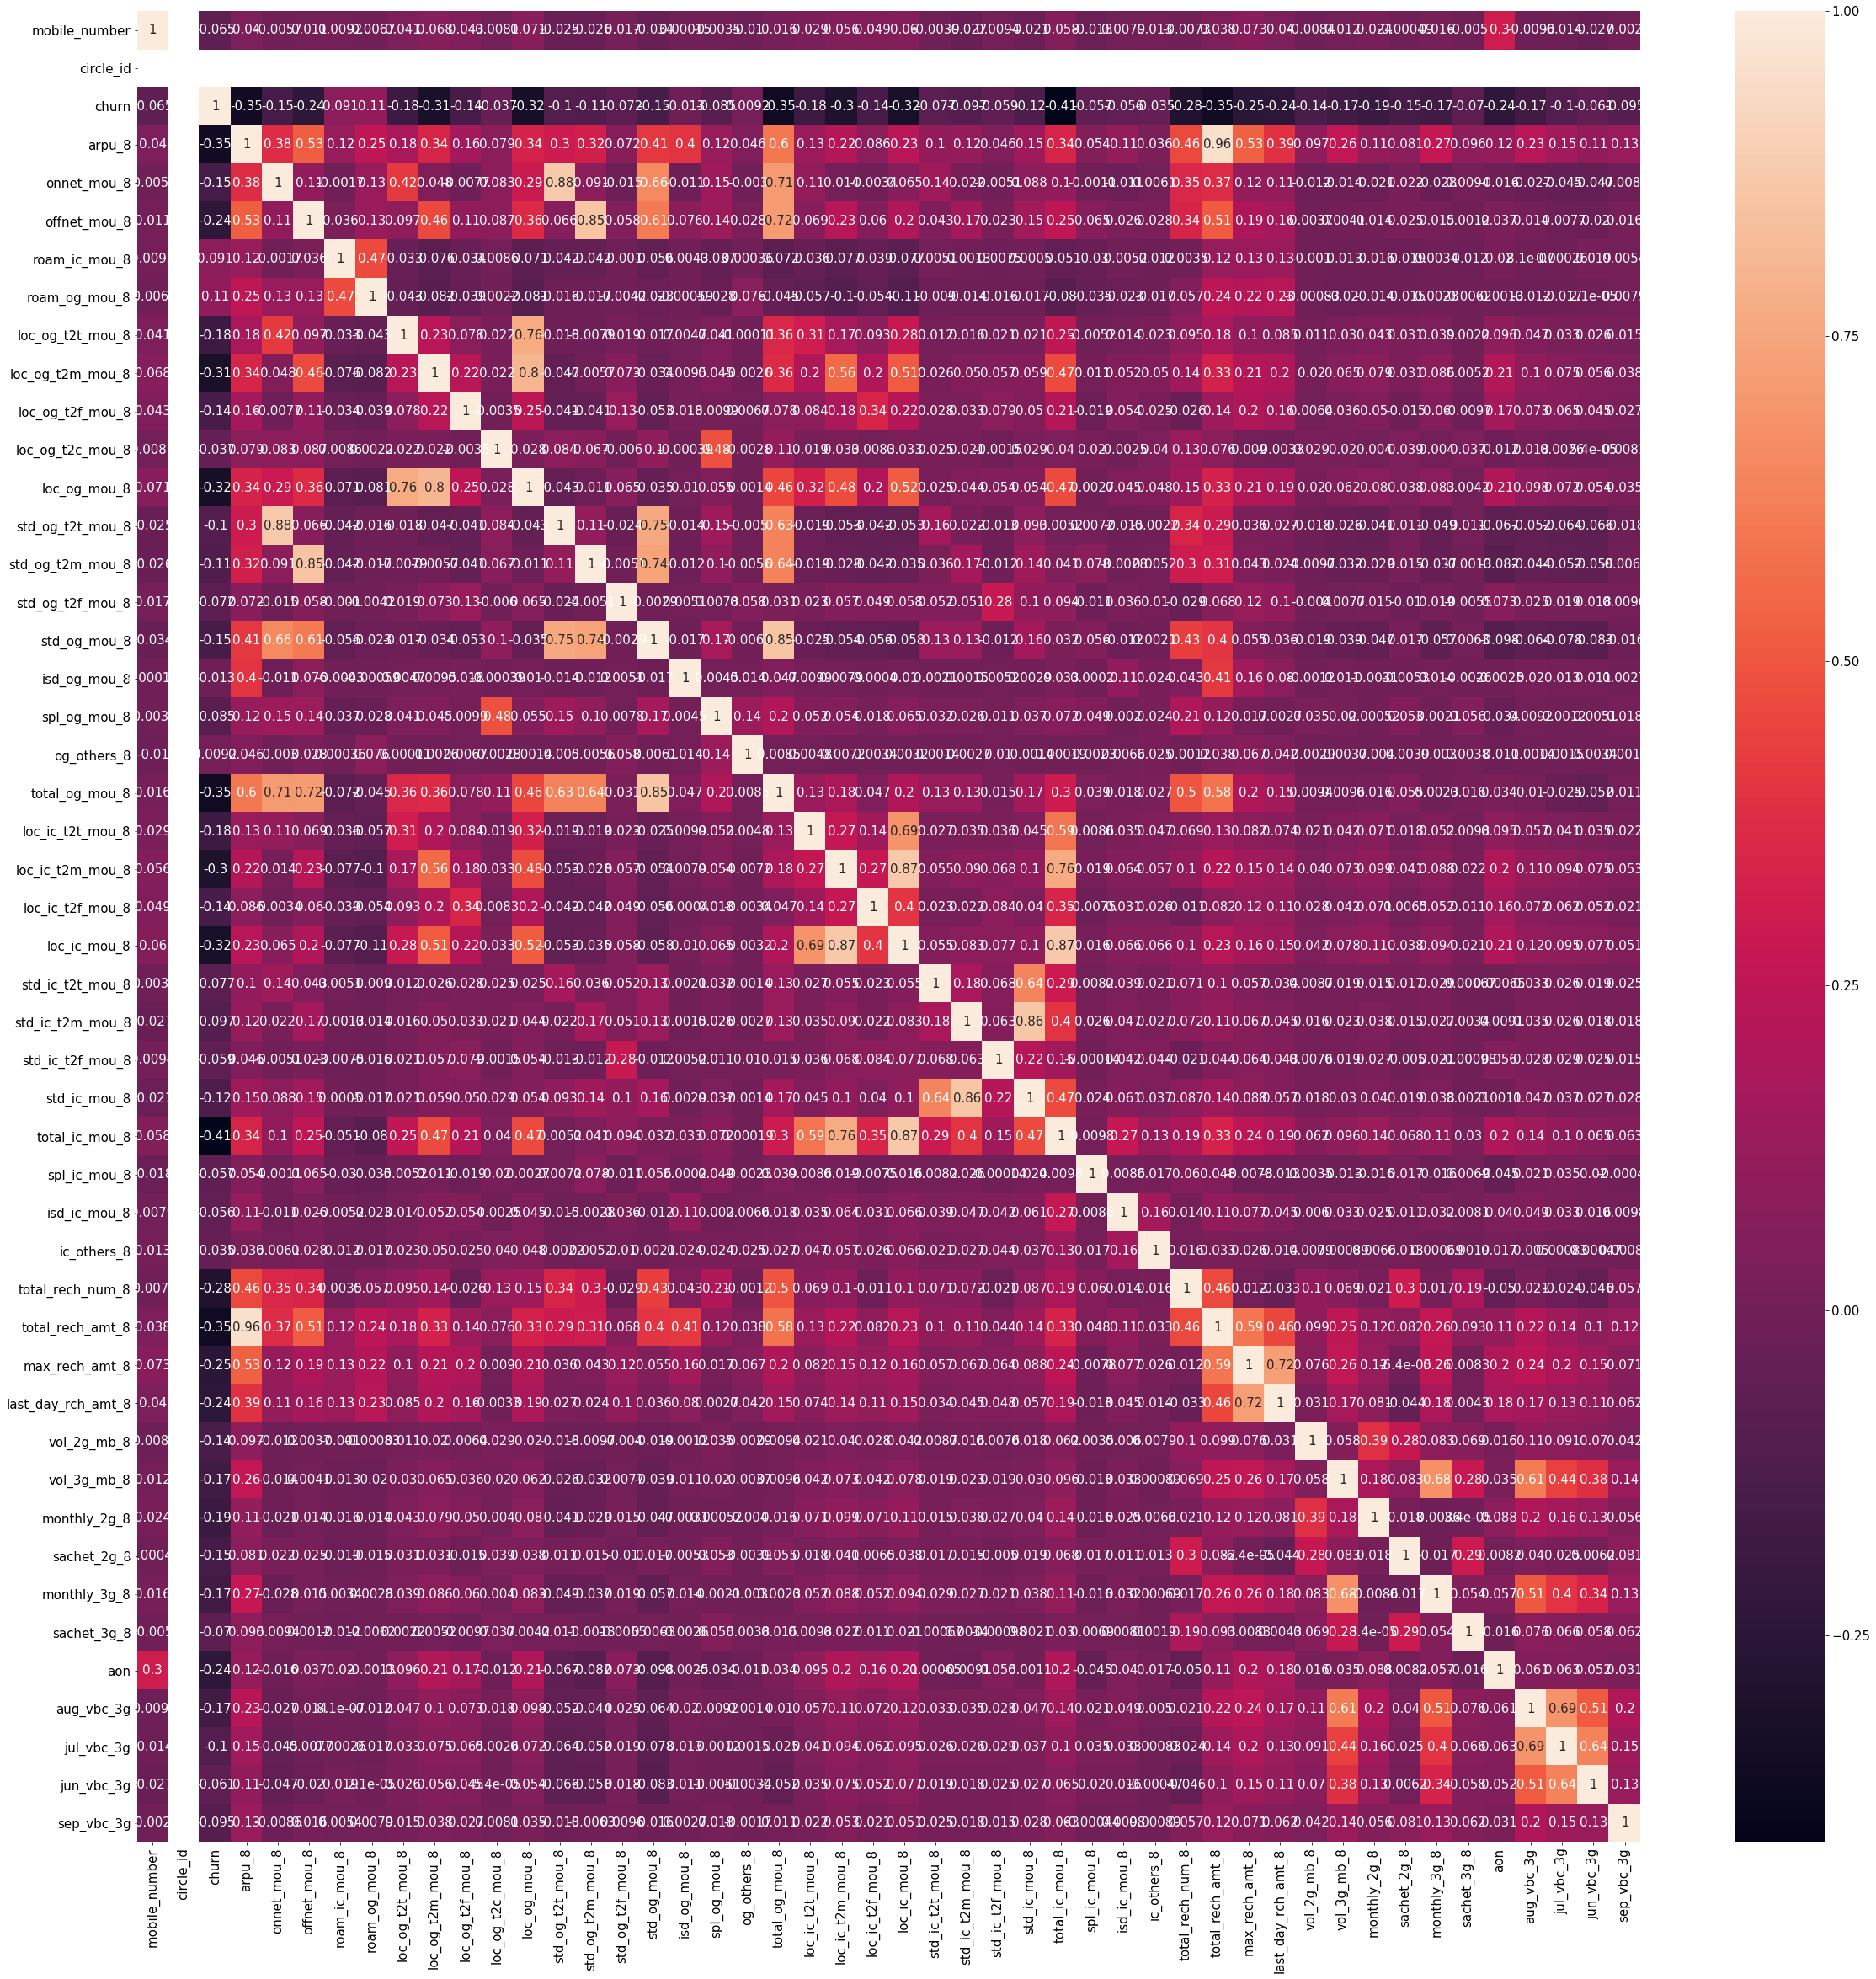

In [40]:
# Let's see the correlation matrix 
plt.rcParams.update({'font.size': 15})
plt.figure(figsize = (40,40))        # Size of the figure
cor_matrix = nor_df.corr()
round(cor_matrix,2)
sns.heatmap(cor_matrix,annot = True)

## Model Building 

In [41]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = nor_df.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = nor_df['churn']

y.head()

8     0
13    0
16    0
17    0
21    0
Name: churn, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [43]:
X_train.shape

(38385, 46)

## Using PCA to reduce dimensionalities

In [44]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [45]:
#fitting the train data to the pca model
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [46]:
pca.components_

array([[-9.99200689e-17,  7.97876547e-03, -3.13467190e-03, ...,
         1.32116625e-02,  9.25692333e-03,  2.40341067e-03],
       [ 4.01236100e-20,  9.95159439e-02,  2.74717533e-01, ...,
         3.05009108e-02,  1.13753806e-02,  8.69582443e-03],
       [ 2.83724503e-20, -1.01378535e-02, -2.66765812e-01, ...,
         1.49684988e-01,  1.10207847e-01,  1.44118939e-02],
       ...,
       [ 3.89819837e-12,  2.18369094e-06,  2.42251739e-06, ...,
         7.23470472e-09,  6.48274476e-08,  2.09876633e-07],
       [ 1.07087722e-11,  7.61150049e-07,  1.29154186e-06, ...,
        -3.86511093e-08, -9.98378414e-08, -9.82267216e-08],
       [-1.00000000e+00, -5.59541326e-15,  2.31033193e-16, ...,
        -2.53105012e-15,  3.97137211e-15, -1.60419992e-15]])

In [47]:
pca.explained_variance_ratio_

array([5.71304117e-01, 9.22333445e-02, 6.57404078e-02, 4.06626079e-02,
       3.19756242e-02, 2.43634231e-02, 2.40689582e-02, 1.95615953e-02,
       1.62098304e-02, 1.16263292e-02, 1.02011164e-02, 9.60833993e-03,
       8.46440655e-03, 8.14461110e-03, 5.46567062e-03, 5.21109184e-03,
       4.98864765e-03, 4.95457688e-03, 4.51773013e-03, 4.28181748e-03,
       4.02330821e-03, 3.74755498e-03, 3.56970641e-03, 3.23836060e-03,
       2.91323521e-03, 2.64425512e-03, 2.53817244e-03, 2.22865102e-03,
       2.13312057e-03, 1.69605802e-03, 1.55637109e-03, 1.48653460e-03,
       1.31569218e-03, 1.20132508e-03, 9.21269278e-04, 8.46309229e-04,
       1.60782420e-04, 1.21755770e-04, 7.09358587e-05, 2.35583503e-06,
       4.76179680e-12, 2.61597048e-12, 1.62332654e-12, 1.07979411e-12,
       4.39995005e-13, 4.67134600e-37])

### Screeplot to identify the best number of components to provide max possible variance

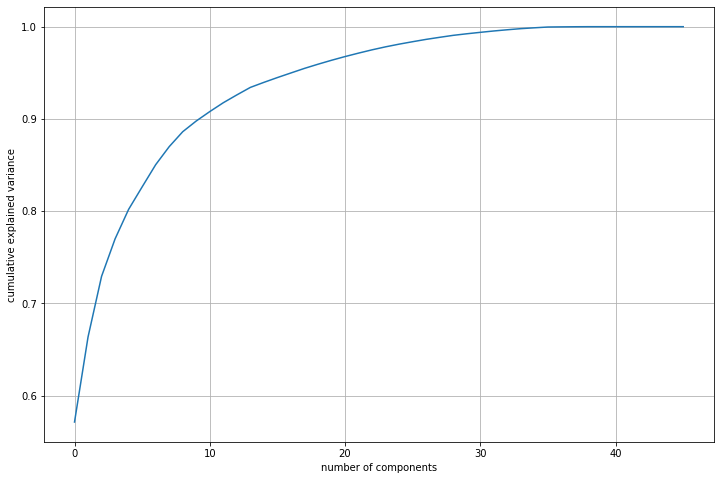

In [48]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

##### From the above observation we can tell 15 components should be enough to explain the variance of more than 90%

In [49]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

In [50]:
#fitting the model with 15 components
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(38385, 15)

In [51]:
corrmat = np.corrcoef(df_train_pca.transpose())

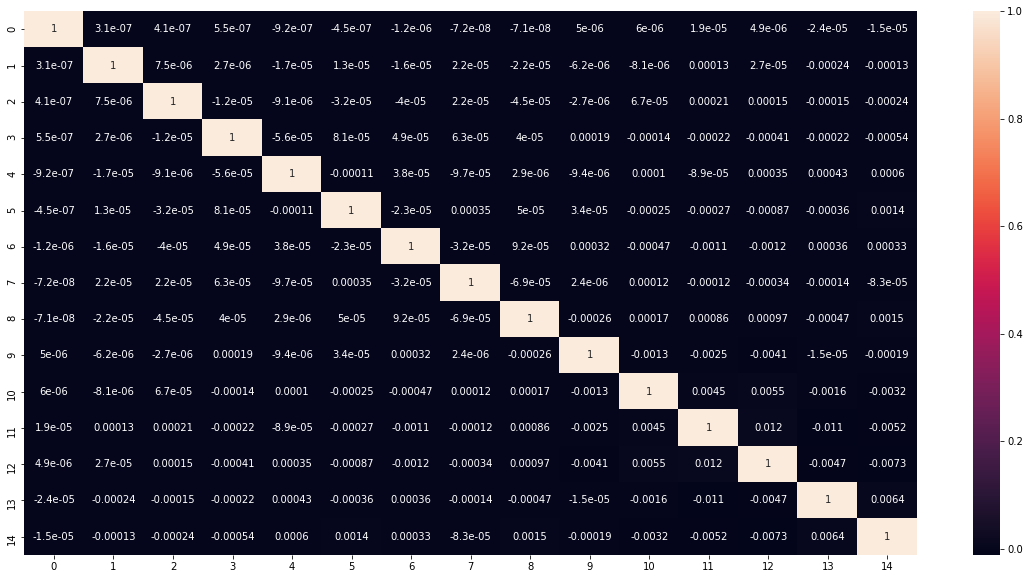

In [52]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [53]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.011860118199156796 , min corr:  -0.010744894197254171


In [54]:
#Applying selected components to the test data - 15 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(16451, 15)

## TRAINING THE CHOSEN ATTRIBUTES WITH LOGISTIC REGRESSION

In [55]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca_lg = learner_pca.fit(df_train_pca,y_train)

In [56]:
#Making prediction on the test data
pred_probs_test_prob = model_pca_lg.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test_prob))

'0.87'

In [57]:
pred_test = model_pca_lg.predict(df_test_pca)
pred_test

array([1, 0, 0, ..., 0, 0, 0])

In [58]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=pred_test)

array([[6179, 2030],
       [1452, 6790]])

In [59]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, pred_test))

# precision
print("precision", metrics.precision_score(y_test, pred_test))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, pred_test))

accuracy 0.7883411342775515
precision 0.7698412698412699
recall 0.8238291676777482


In [60]:
# specificity (% of churns correctly classified)
print("specificity", 6179/(6179+2030)*100)

specificity 75.27104397612376


#### automatically choosing the components that explain 95% variance for verification

In [61]:
# Approx 95% of the variance is explained by chosen components
pca_again = PCA(0.95)

In [62]:
components = pca_again.fit_transform(X_train)

In [63]:
components.shape

(38385, 18)

In [64]:
#training the logistic regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(components,y_train)

In [65]:
#applying the model and testing it on test data
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(16451, 18)

In [66]:
#Making prediction on the test data using probabilities
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.87'

# RESULTS FOR LOGISTIC REGRESSION

#### From the above model, we observe that,
#### 1) Accuracy-78.8%
#### 2) Precision-76.9%
#### 3) Recall-82.3%
#### 4)Specificity-75.2%



#### Hence we can safely assume that these are the optimum results that can be obtained from Logistic Regression.

## TRAINING WITH SVM Classifier

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Model building

# instantiate an object of class SVC()
# note that we are using cost C=1
model_svc = SVC(C = 1)

# fit
model_svc.fit(df_train_pca,y_train)

# predict
y_pred = model_svc.predict(df_test_pca)

In [68]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6308, 1901],
       [1563, 6679]])

In [69]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))


accuracy 0.7894352926873747
precision 0.7784382284382284
recall 0.8103615627274934


In [70]:
# specificity (% of churns correctly classified)
print("specificity-",(6308/(6308+1901)*100))

specificity- 76.84248995005481


The SVM we have built so far gives decently good results - an accuracy of 79%, sensitivity/recall (TNR) of 81%.

79% of all churns are classified correctly
81% of spams are identified correctly (sensitivity/recall)
Specificity, or % of churns classified correctly, is 76.8%

## Hyperparameter Tuning for SVM

## Grid Search to Find Optimal Hyperparameter C for SVM

K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have. 

But we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

In [72]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)      

In [73]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(df_train_pca,y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 22.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [74]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      39.813772      1.574255         5.573171        0.184237     0.1   
1      30.883117      0.777773         4.172188        0.101799       1   
2      26.884363      0.525006         3.587408        0.101867      10   
3      28.630741      0.746501         3.518078        0.083268     100   
4      38.625221      1.023950         3.320650        0.065998    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.1}           0.727237           0.725023           0.732578   
1     {'C': 1}           0.789241           0.794581           0.790152   
2    {'C': 10}           0.801355           0.805784           0.800964   
3   {'C': 100}           0.806174           0.810733           0.803048   
4  {'C': 1000}           0.810473           0.816204           0.808258   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.734792           0.737788         0.731484        0.004726   
1           0.791455           0.795102         0.792106        0.002348   
2           0.800573           0.806174         0.802970        0.002472   
3           0.802527           0.806565         0.805810        0.002944   
4           0.808128           0.812818         0.811176        0.003042   

   rank_test_score  split0_train_score  split1_train_score  \
0                5            0.732610            0.731210   
1                4            0.792562            0.790901   
2                3            0.803537            0.801387   
3                2            0.806598            0.805328   
4                1            0.811352            0.811613   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.732969            0.731894            0.730950   
1            0.792530            0.792953            0.792171   
2            0.803569            0.804318            0.802364   
3            0.806663            0.806695            0.806467   
4            0.811547            0.812003            0.810733   

   mean_train_score  std_train_score  
0          0.731927         0.000777  
1          0.792224         0.000706  
2          0.803035         0.001034  
3          0.806350         0.000517  
4          0.811450         0.000416

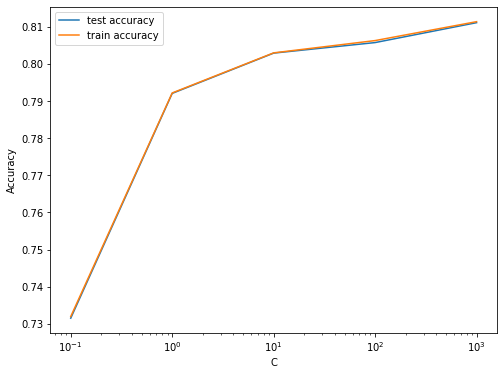

In [75]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data). 



Let's finally look at the optimal C values found by GridSearchCV.

In [76]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.8111762407190308 at C = 1000


In [77]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(df_train_pca,y_train)

# predict
y_pred = model.predict(df_test_pca)

In [78]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))

accuracy 0.8083399185459851
precision 0.8282802219068507
recall 0.7789371511768988


# RESULTS FOR SVM CLASSIFIER

#### From the above model, we observe that,
#### 1) Accuracy-80.8%
#### 2) Precision-82.8%
#### 3) Recall-77.8%



#### Hence we can safely assume that these are the optimum results that can be obtained from SVM Classifier.

## TRAINING WITH RANDOM FOREST CLASSIFIER



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [79]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [80]:
# fitting the PCA attributes into ran
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [82]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [83]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8209
           1       0.97      1.00      0.99      8242

    accuracy                           0.99     16451
   macro avg       0.99      0.99      0.99     16451
weighted avg       0.99      0.99      0.99     16451



In [84]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7968  241]
 [   2 8240]]


In [85]:
print(accuracy_score(y_test,predictions))

0.985228861467388


In [86]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, predictions))

# precision
print("precision", metrics.precision_score(y_test, predictions))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, predictions))


accuracy 0.985228861467388
precision 0.9715835396769249
recall 0.9997573404513468


In [87]:
# specificity (% of churns correctly classified)
print("specificity-",(7989/(7989+220)*100))

specificity- 97.32001461810208


As we can see in the above case, even if the metrics have better accuracy, we will have to verify it by the process of hyperparameter tuning in order to make sure that there is no overfitting.

## Grid Search to Find Optimal Hyperparameters for Random Forest

We can now find the optimal hyperparameters for Random Forest using GridSearchCV .

In [88]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [89]:
# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 16.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [90]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8304806565064479 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters for Random Forest obtained from grid search.**

In [91]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200)

In [92]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
# predict
predictions = rfc.predict(df_test_pca)

In [94]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      8209
           1       0.88      0.79      0.83      8242

    accuracy                           0.84     16451
   macro avg       0.84      0.84      0.84     16451
weighted avg       0.84      0.84      0.84     16451



In [96]:
print(confusion_matrix(y_test,predictions))

[[7296  913]
 [1711 6531]]


In [97]:
print(accuracy_score(y_test,predictions))

0.8404960184791198


In [98]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, predictions))

# precision
print("precision", metrics.precision_score(y_test, predictions))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, predictions))


accuracy 0.8404960184791198
precision 0.8773508866200967
recall 0.7924047561271536


In [161]:
# specificity (% of churns correctly classified)
print("specificity-",(7296/(7296+913)*100))

specificity- 88.87806066512366


# RESULTS OF RANDOM FOREST

#### From the above model, we observe that,
#### 1) Accuracy-84.04%
#### 2) Precision-87.7%
#### 3) Recall-79.24%
#### 4) Specificity-88.87%



#### Hence we can safely assume that these are the optimum results that can be obtained from Random Forest Classifier.

# CONCLUSION FOR PROBLEM STATEMENT-1

According to the problem statement, we are supposed to identify the most number of churn members, and hence precision only says how many of the identified churn customers are actually churned customers. Whereas, the main objective is to increase the percentage of recall, as it is the percentage of identifying the churn customers of all the churn customers. Hence from the objective and the results we can say that logistic regression has the higheest recall percentage.


#### Hence Logistic regression model is the best fit for identifying churn customers.

# PROBLEM STATEMENT-2

#### as we can't find the most important attributes by using pca, we will use RFE to find those important attributes.

### Logistic Regression with RFE

In [100]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38339
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15870.
Date:                Mon, 19 Aug 2019   Deviance:                       31739.
Time:                        16:53:11   Pearson chi2:                 4.00e+07
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
circle_id              0.0029      0.001      2.420      0.016       0.001       0.005
arpu_8                53.2446      4.515     11.793      0.000      44.395      62.094
onnet_mou_8          -31.8081     19.523     -1.629      0.103     -70.073       6.456
offnet_mou_8         -48.9618     24.852     -1.970      0.049     -97.670      -0.253
roam_ic_mou_8          5.5343      0.917      6.036      0.000       3.737       7.331
roam_og_mou_8         25.1695      9.549      2.636      0.008       6.454      43.885
loc_og_t2t_mou_8    3.161e+05    2.8e+04     11.283      0.000    2.61e+05    3.71e+05
loc_og_t2m_mou_8    1.458e+05   1.29e+04     11.283      0.000     1.2e+05    1.71e+05
loc_og_t2f_mou_8    2.729e+04   2418.930     11.283      0.000    2.26e+04     3.2e+04
loc_og_t2c_mou_8       3.8010      0.917      4.145      0.000       2.004       5.598
loc_og_mou_8         -4.1e+05   3.11e+04    -13.197      0.000   -4.71e+05   -3.49e+05
std_og_t2t_mou_8    1.512e+05   2.54e+04      5.943      0.000    1.01e+05    2.01e+05
std_og_t2m_mou_8    2.631e+05   4.43e+04      5.943      0.000    1.76e+05     3.5e+05
std_og_t2f_mou_8    9745.5976   1640.647      5.940      0.000    6529.988     1.3e+04
std_og_mou_8       -3.719e+05   4.63e+04     -8.032      0.000   -4.63e+05   -2.81e+05
isd_og_mou_8       -4.401e+04   8185.495     -5.376      0.000   -6.01e+04    -2.8e+04
spl_og_mou_8       -1.078e+04   2003.991     -5.379      0.000   -1.47e+04   -6851.814
og_others_8        -3057.8709    568.965     -5.374      0.000   -4173.021   -1942.720
total_og_mou_8      1.088e+05   2.02e+04      5.377      0.000    6.91e+04    1.48e+05
loc_ic_t2t_mou_8    1.723e+05   9873.249     17.455      0.000    1.53e+05    1.92e+05
loc_ic_t2m_mou_8     2.47e+05   1.42e+04     17.455      0.000    2.19e+05    2.75e+05
loc_ic_t2f_mou_8    6.839e+04   3917.947     17.455      0.000    6.07e+04    7.61e+04
loc_ic_mou_8       -1.792e+05    1.8e+04     -9.975      0.000   -2.14e+05   -1.44e+05
std_ic_t2t_mou_8    3.109e+04   1.36e+04      2.286      0.022    4432.349    5.77e+04
std_ic_t2m_mou_8    4.073e+04   1.78e+04      2.286      0.022    5813.702    7.57e+04
std_ic_t2f_mou_8    1.006e+04   4402.058      2.286      0.022    1434.635    1.87e+04
std_ic_mou_8        2.774e+04    2.2e+04      1.259      0.208   -1.55e+04    7.09e+04
total_ic_mou_8     -7.112e+04   1.32e+04     -5.386      0.000    -9.7e+04   -4.52e+04
spl_ic_mou_8          57.7241     13.921      4.147      0.000      30.440      85.008
isd_ic_mou_8        4.868e+04   9039.194      5.385      0.000     3.1e+04    6.64e+04
ic_others_8         1.437e+04   2667.157      5.386      0.000    9137.994    1.96e+04
total_rech_num_8      -5.0527      0.479    -10.546      0.000      -5.992      -4.114
total_rech_amt_8     -46.8144      5.191     -9.019      0.000     -56.988     -36.640
max_rech_amt_8         7.0253 

In [101]:
#X_test2 = X_test.drop(['arpu_8','onnet_mou_8','offnet_mou_8','total_og_mou_8','loc_og_mou_8','std_og_mou_8','total_ic_mou_8','loc_ic_mou_8'],1)
#X_train2 = X_train.drop(['arpu_8','onnet_mou_8','offnet_mou_8','total_og_mou_8','loc_og_mou_8','std_og_mou_8','total_ic_mou_8','loc_ic_mou_8'],1)

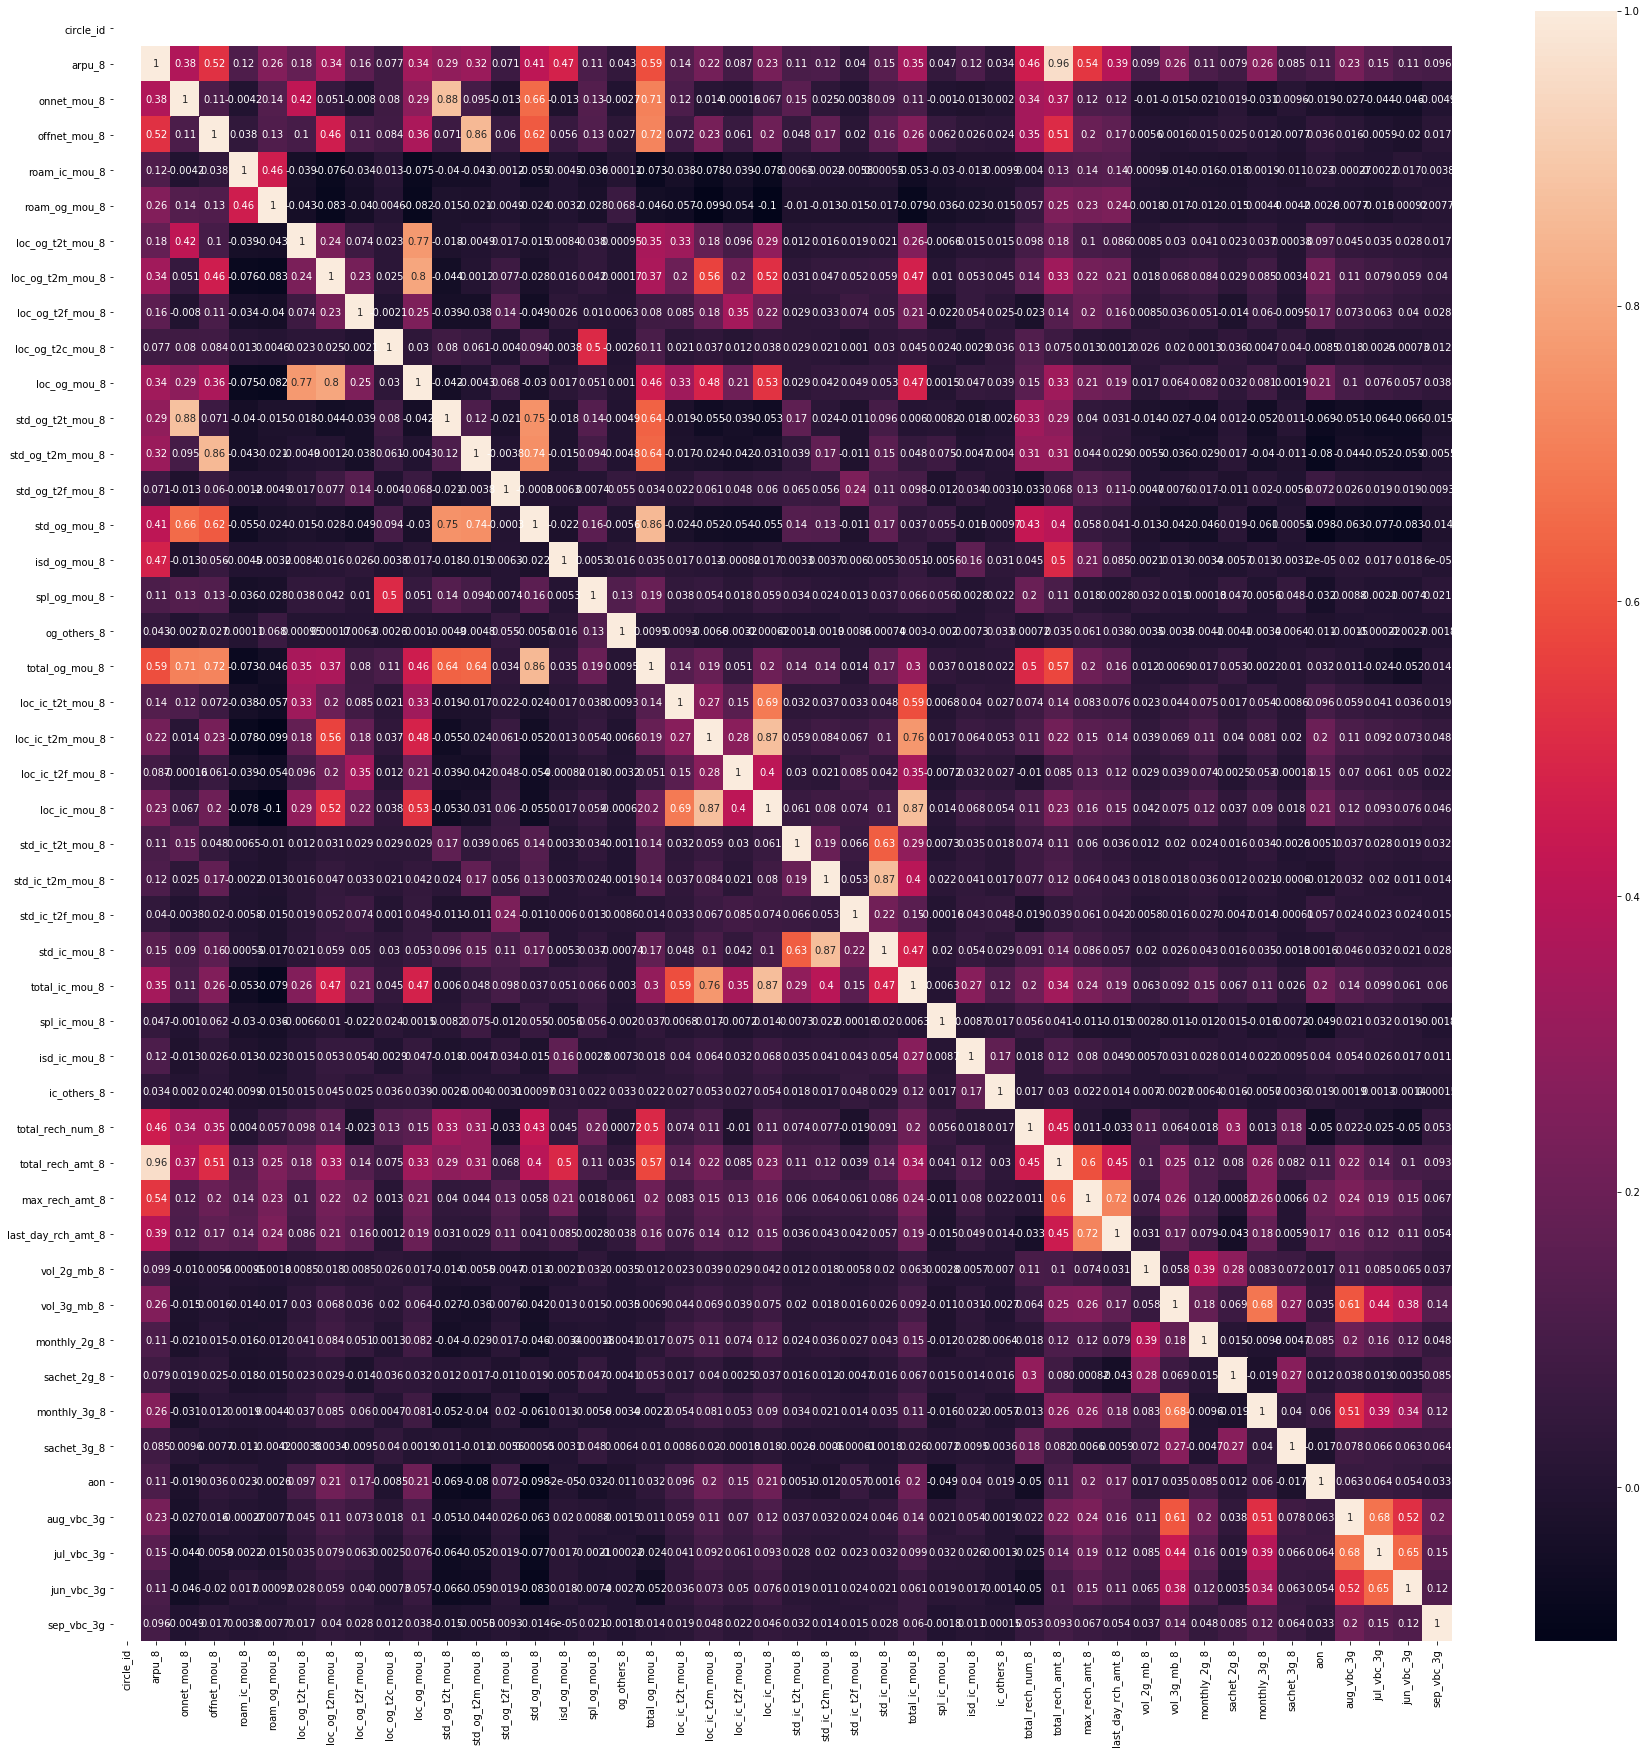

In [102]:
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(),annot = True)

In [103]:
#X_test2 = X_test2.drop(['std_ic_mou_8','aug_vbc_3g','monthly_3g_8','max_rech_amt_8'],1)
#X_train2 = X_train2.drop(['std_ic_mou_8','aug_vbc_3g','monthly_3g_8','max_rech_amt_8'],1)

In [104]:
#logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
#logm2.fit().summary()

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True  True False  True False False  True False
  True False  True False False False  True False False False False False
  True False  True  True  True  True False  True False False  True  True
 False  True  True  True False False False False False  True]
[27 19  1  5  1  1 21  1 17 14  1  8  1  6  1 13 16 18  1  2 23 26  9 20
  1 25  1  1  1  1 12  1  4 24  1  1  7  1  1  1 10 11  3 22 15  1]


In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('circle_id', False, 27),
 ('arpu_8', False, 19),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 5),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 21),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 17),
 ('loc_og_t2c_mou_8', False, 14),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_8', False, 8),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 6),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_8', False, 13),
 ('spl_og_mou_8', False, 16),
 ('og_others_8', False, 18),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', False, 2),
 ('loc_ic_t2m_mou_8', False, 23),
 ('loc_ic_t2f_mou_8', False, 26),
 ('loc_ic_mou_8', False, 9),
 ('std_ic_t2t_mou_8', False, 20),
 ('std_ic_t2m_mou_8', True, 1),
 ('std_ic_t2f_mou_8', False, 25),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', False, 12),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', F

In [107]:
# Selected columns for building model by RFE
col = X_train.columns[rfe.support_]
col

Index(['onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [108]:
X_train.columns[~rfe.support_]

Index(['circle_id', 'arpu_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'vol_3g_mb_8', 'sachet_3g_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38364
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16675.
Date:                Mon, 19 Aug 2019   Deviance:                       33351.
Time:                        16:53:30   Pearson chi2:                 4.50e+08
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.3765      0.025     54.995      0.000       1.327       1.426
onnet_mou_8            5.0287      3.612      1.392      0.164      -2.051      12.109
roam_ic_mou_8          7.1484      0.871      8.208      0.000       5.441       8.855
roam_og_mou_8         10.5684      1.267      8.338      0.000       8.084      13.053
loc_og_t2m_mou_8      -4.5620      2.097     -2.176      0.030      -8.671      -0.453
loc_og_mou_8          67.6537      4.808     14.070      0.000      58.230      77.078
std_og_t2m_mou_8       6.3417      4.820      1.316      0.188      -3.105      15.789
std_og_mou_8          99.5254      5.856     16.997      0.000      88.049     111.002
total_og_mou_8      -112.7342      3.322    -33.933      0.000    -119.246    -106.223
std_ic_t2m_mou_8       8.5647      2.897      2.956      0.003       2.886      14.243
std_ic_mou_8           5.0571      2.739      1.847      0.065      -0.310      10.425
total_ic_mou_8       -19.9051      0.819    -24.294      0.000     -21.511     -18.299
spl_ic_mou_8         -15.7526      1.160    -13.585      0.000     -18.025     -13.480
isd_ic_mou_8          13.8545      1.182     11.717      0.000      11.537      16.172
total_rech_num_8      -5.4964      0.425    -12.921      0.000      -6.330      -4.663
last_day_rch_amt_8   -17.2401      0.665    -25.918      0.000     -18.544     -15.936
vol_2g_mb_8           -3.6911      1.117     -3.304      0.001      -5.881      -1.502
monthly_2g_8          -6.4907      0.379    -17.120      0.000      -7.234      -5.748
sachet_2g_8           -6.0651      0.539    -11.251      0.000      -7.122      -5.009
monthly_3g_8         -13.5773      0.749    -18.115      0.000     -15.046     -12.108
sep_vbc_3g           -67.6886      6.557    -10.324      0.000     -80.539     -54.838
======================================================================================
"""

In [110]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

85377    0.841343
50539    0.346752
66727    0.608173
720      0.653532
13974    0.720552
84165    0.090854
13694    0.971262
19640    0.971262
6346     0.191372
61120    0.850572
dtype: float64

In [111]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84134285, 0.34675196, 0.60817297, 0.6535318 , 0.72055232,
       0.0908543 , 0.97126226, 0.97126226, 0.19137178, 0.85057207])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [112]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.841343   85377
1      1    0.346752   50539
2      0    0.608173   66727
3      1    0.653532     720
4      0    0.720552   13974

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.841343   85377          1
1      1    0.346752   50539          0
2      0    0.608173   66727          1
3      1    0.653532     720          1
4      0    0.720552   13974          1

In [114]:
from sklearn import metrics

In [115]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[15480  3729]
 [ 3332 15844]]


In [116]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.816047935391429


In [117]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
6         std_og_mou_8  172.18
0          onnet_mou_8   82.49
5     std_og_t2m_mou_8   60.35
4         loc_og_mou_8   57.02
7       total_og_mou_8   41.43
3     loc_og_t2m_mou_8   24.17
9         std_ic_mou_8    5.22
8     std_ic_t2m_mou_8    4.55
2        roam_og_mou_8    3.68
10      total_ic_mou_8    3.03
13    total_rech_num_8    2.44
14  last_day_rch_amt_8    1.48
1        roam_ic_mou_8    1.41
15         vol_2g_mb_8    1.37
17         sachet_2g_8    1.32
16        monthly_2g_8    1.30
12        isd_ic_mou_8    1.14
18        monthly_3g_8    1.14
11        spl_ic_mou_8    1.05
19          sep_vbc_3g    1.04

In [119]:
col = col.drop('std_og_mou_8', 1)
col

Index(['onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [120]:
#Lets check VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6       total_og_mou_8  35.46
0          onnet_mou_8  13.59
5     std_og_t2m_mou_8   9.97
3     loc_og_t2m_mou_8   6.90
8         std_ic_mou_8   5.19
4         loc_og_mou_8   5.10
7     std_ic_t2m_mou_8   4.55
9       total_ic_mou_8   3.01
12    total_rech_num_8   2.44
2        roam_og_mou_8   1.81
13  last_day_rch_amt_8   1.47
14         vol_2g_mb_8   1.37
1        roam_ic_mou_8   1.33
16         sachet_2g_8   1.32
15        monthly_2g_8   1.30
11        isd_ic_mou_8   1.14
17        monthly_3g_8   1.13
10        spl_ic_mou_8   1.05
18          sep_vbc_3g   1.04

In [121]:
col = col.drop('total_og_mou_8', 1)
col

Index(['onnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2m_mou_8', 'std_ic_t2m_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g'],
      dtype='object')

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7         std_ic_mou_8  5.16
4         loc_og_mou_8  5.10
3     loc_og_t2m_mou_8  4.62
6     std_ic_t2m_mou_8  4.55
8       total_ic_mou_8  2.89
11    total_rech_num_8  2.40
0          onnet_mou_8  1.91
12  last_day_rch_amt_8  1.47
2        roam_og_mou_8  1.46
13         vol_2g_mb_8  1.37
5     std_og_t2m_mou_8  1.36
1        roam_ic_mou_8  1.32
15         sachet_2g_8  1.32
14        monthly_2g_8  1.30
16        monthly_3g_8  1.13
10        isd_ic_mou_8  1.13
9         spl_ic_mou_8  1.04
17          sep_vbc_3g  1.04

In [123]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38366
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17596.
Date:                Mon, 19 Aug 2019   Deviance:                       35192.
Time:                        16:53:34   Pearson chi2:                 1.42e+07
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7897      0.024     75.434      0.000       1.743       1.836
onnet_mou_8           -4.3001      0.455     -9.448      0.000      -5.192      -3.408
roam_ic_mou_8          5.9469      0.795      7.480      0.000       4.389       7.505
roam_og_mou_8         13.0404      0.661     19.740      0.000      11.746      14.335
loc_og_t2m_mou_8      -4.8055      1.009     -4.762      0.000      -6.784      -2.828
loc_og_mou_8          -3.6167      1.493     -2.423      0.015      -6.542      -0.691
std_og_t2m_mou_8      -6.1180      0.650     -9.414      0.000      -7.392      -4.844
std_ic_t2m_mou_8       6.0630      2.631      2.305      0.021       0.907      11.219
std_ic_mou_8          24.8784      2.483     10.021      0.000      20.012      29.744
total_ic_mou_8       -35.2424      0.827    -42.622      0.000     -36.863     -33.622
spl_ic_mou_8         -11.4425      1.029    -11.118      0.000     -13.460      -9.425
isd_ic_mou_8          24.0174      1.180     20.353      0.000      21.705      26.330
total_rech_num_8     -10.1627      0.438    -23.196      0.000     -11.021      -9.304
last_day_rch_amt_8   -18.7569      0.653    -28.710      0.000     -20.037     -17.476
vol_2g_mb_8           -4.4203      1.140     -3.878      0.000      -6.654      -2.186
monthly_2g_8          -6.9442      0.384    -18.096      0.000      -7.696      -6.192
sachet_2g_8           -6.4941      0.564    -11.522      0.000      -7.599      -5.389
monthly_3g_8         -12.7400      0.713    -17.859      0.000     -14.138     -11.342
sep_vbc_3g           -72.3260      6.789    -10.653      0.000     -85.632     -59.020
======================================================================================
"""

In [124]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [125]:
y_train_pred[:10]

array([0.87821801, 0.21027459, 0.63757559, 0.72910537, 0.69308638,
       0.02307459, 0.84983085, 0.84983085, 0.14138599, 0.49630533])

In [126]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [127]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.878218   85377          1
1      1    0.210275   50539          0
2      0    0.637576   66727          1
3      1    0.729105     720          1
4      0    0.693086   13974          1

In [128]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.807320567930181


The accuracy is still practically the same.

In [129]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[14821,  4388],
       [ 3008, 16168]])

In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.807320567930181

## Final Model Prediction

In [131]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
telecom_model = LogisticRegression(C=1e9)
telecom_model.fit(X_train_sm, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
X_test = X_test[col]
X_test.head()

onnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2m_mou_8  \
86484     0.000497       0.000223       0.003032          0.001709   
16662     0.007250       0.000000       0.000000          0.047624   
37046     0.014544       0.000000       0.000000          0.017467   
63364     0.048182       0.010235       0.007922          0.092513   
74545     0.008392       0.000000       0.000000          0.016927   

       loc_og_mou_8  std_og_t2m_mou_8  std_ic_t2m_mou_8  std_ic_mou_8  \
86484      0.000875          0.001680          0.000000      0.000193   
16662      0.033140          0.004839          0.017882      0.018000   
37046      0.009199          0.078957          0.000000      0.000000   
63364      0.070085          0.029968          0.055657      0.077626   
74545      0.008785          0.064677          0.000016      0.000077   

       total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  total_rech_num_8  \
86484        0.002611      0.000000      0.001873          0.020408   
16662        0.131923      0.000000      0.012923          0.025510   
37046        0.014736      0.000000      0.000000          0.056122   
63364        0.181499      0.000000      0.000271          0.076531   
74545        0.031253      0.040128      0.000000          0.040816   

       last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  \
86484            0.000000     0.000000           0.0          0.0   
16662            0.000000     0.000000           0.0          0.0   
37046            0.011238     0.000000           0.0          0.0   
63364            0.056642     0.032677           0.0          0.0   
74545            0.029220     0.000000           0.0          0.0   

       monthly_3g_8  sep_vbc_3g  
86484         0.000    0.000000  
16662         0.000    0.023979  
37046         0.000    0.000000  
63364         0.375    0.000000  
74545         0.000    0.000000

In [133]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [134]:
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred[:10]

86484    0.825950
16662    0.012177
37046    0.456721
63364    0.000045
74545    0.218125
91721    0.838017
55755    0.535565
46281    0.724414
55905    0.097778
33863    0.850973
dtype: float64

In [136]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
86484  0.825950
16662  0.012177
37046  0.456721
63364  0.000045
74545  0.218125

In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [141]:
y_pred_final.head()

churn  CustID         0
0      1   86484  0.825950
1      0   16662  0.012177
2      0   37046  0.456721
3      0   63364  0.000045
4      0   74545  0.218125

In [142]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [143]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','churn','Churn_Prob'], axis=1)
y_pred_final.head()

CustID  churn  Churn_Prob
0   86484      1    0.825950
1   16662      0    0.012177
2   37046      0    0.456721
3   63364      0    0.000045
4   74545      0    0.218125

In [144]:
print(y_pred_final[(y_pred_final.churn == 1)].shape[0])
cutoff_probabilities = [0.01,0.05,0.1,0.2,0.3,0.4,0.5]

for cutoff_prob in cutoff_probabilities:
    correctly_predicted = y_pred_final[(y_pred_final.churn == 1) & (y_pred_final.Churn_Prob>=cutoff_prob)].shape[0]
    wrongly_predicted = y_pred_final[(y_pred_final.churn == 1)].shape[0]-y_pred_final[(y_pred_final.churn == 1) & (y_pred_final.Churn_Prob>=cutoff_prob)].shape[0]
    print("cutoff_prob={},correctly_predicted={},wrongly_predicted={}".format(cutoff_prob,correctly_predicted,wrongly_predicted))    

8242
cutoff_prob=0.01,correctly_predicted=8162,wrongly_predicted=80
cutoff_prob=0.05,correctly_predicted=8076,wrongly_predicted=166
cutoff_prob=0.1,correctly_predicted=7988,wrongly_predicted=254
cutoff_prob=0.2,correctly_predicted=7751,wrongly_predicted=491
cutoff_prob=0.3,correctly_predicted=7509,wrongly_predicted=733
cutoff_prob=0.4,correctly_predicted=7208,wrongly_predicted=1034
cutoff_prob=0.5,correctly_predicted=6941,wrongly_predicted=1301


In [145]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [146]:
y_pred_final.head()

CustID  churn  Churn_Prob  final_predicted
0   86484      1    0.825950                1
1   16662      0    0.012177                0
2   37046      0    0.456721                1
3   63364      0    0.000045                0
4   74545      0    0.218125                0

In [147]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.7775211233359675

In [148]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[5583, 2626],
       [1034, 7208]])

In [149]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8745450133462752

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.6801071994152759

### Precision and recall tradeoff

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_pred_final.churn, y_pred_final.final_predicted

(0        1
 1        0
 2        0
 3        0
 4        0
 5        1
 6        1
 7        1
 8        1
 9        1
 10       1
 11       1
 12       1
 13       1
 14       1
 15       0
 16       1
 17       1
 18       0
 19       1
 20       1
 21       1
 22       0
 23       0
 24       1
 25       1
 26       1
 27       0
 28       1
 29       1
 30       0
 31       1
 32       0
 33       0
 34       0
 35       1
 36       0
 37       0
 38       1
 39       0
 40       0
 41       0
 42       1
 43       1
 44       1
 45       0
 46       0
 47       0
 48       1
         ..
 16402    0
 16403    0
 16404    0
 16405    1
 16406    1
 16407    1
 16408    1
 16409    1
 16410    0
 16411    0
 16412    0
 16413    1
 16414    0
 16415    0
 16416    1
 16417    0
 16418    0
 16419    1
 16420    1
 16421    1
 16422    0
 16423    0
 16424    1
 16425    0
 16426    1
 16427    0
 16428    0
 16429    1
 16430    0
 16431    0
 16432    0
 16433    0
 16434    1
 164

In [154]:
p, r, thresholds = precision_recall_curve(y_pred_final.churn, y_pred_final.Churn_Prob)

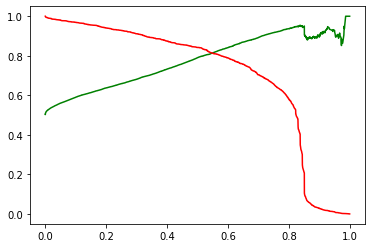

In [155]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [156]:
from sklearn.metrics import precision_score, recall_score

In [157]:
precision_score(y_pred_final.churn, y_pred_final.final_predicted)

0.7329672564571893

In [158]:
recall_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8745450133462752

# Conclusion for Problem Statement-2
##### Following are the important columns to explain whether the customer will chrun or not

In [159]:
list(X_train_sm.columns)

['const',
 'onnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'std_og_t2m_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sep_vbc_3g']

In [160]:
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38385
Model:                            GLM   Df Residuals:                    38366
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17596.
Date:                Mon, 19 Aug 2019   Deviance:                       35192.
Time:                        16:53:36   Pearson chi2:                 1.42e+07
No. Iterations:                     8   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7897      0.024     75.434      0.000       1.743       1.836
onnet_mou_8           -4.3001      0.455     -9.448      0.000      -5.192      -3.408
roam_ic_mou_8          5.9469      0.795      7.480      0.000       4.389       7.505
roam_og_mou_8         13.0404      0.661     19.740      0.000      11.746      14.335
loc_og_t2m_mou_8      -4.8055      1.009     -4.762      0.000      -6.784      -2.828
loc_og_mou_8          -3.6167      1.493     -2.423      0.015      -6.542      -0.691
std_og_t2m_mou_8      -6.1180      0.650     -9.414      0.000      -7.392      -4.844
std_ic_t2m_mou_8       6.0630      2.631      2.305      0.021       0.907      11.219
std_ic_mou_8          24.8784      2.483     10.021      0.000      20.012      29.744
total_ic_mou_8       -35.2424      0.827    -42.622      0.000     -36.863     -33.622
spl_ic_mou_8         -11.4425      1.029    -11.118      0.000     -13.460      -9.425
isd_ic_mou_8          24.0174      1.180     20.353      0.000      21.705      26.330
total_rech_num_8     -10.1627      0.438    -23.196      0.000     -11.021      -9.304
last_day_rch_amt_8   -18.7569      0.653    -28.710      0.000     -20.037     -17.476
vol_2g_mb_8           -4.4203      1.140     -3.878      0.000      -6.654      -2.186
monthly_2g_8          -6.9442      0.384    -18.096      0.000      -7.696      -6.192
sachet_2g_8           -6.4941      0.564    -11.522      0.000      -7.599      -5.389
monthly_3g_8         -12.7400      0.713    -17.859      0.000     -14.138     -11.342
sep_vbc_3g           -72.3260      6.789    -10.653      0.000     -85.632     -59.020
======================================================================================
"""

# BUSINESS RECOMMENDATIONS

1) As we have identified the main columns or attributes which tell the story of churned customers, we can reflect on the lines of the above provided attributes.

2) 2g and 3g plans could be altered as these columns also influence the churn customers

3) Give some sorts of discounts for roaming customers looking at the competetors margins

4) Take a closer look at the plans that involve the local calls made amongst the same network and work out the margins in terms of cost reduction.